In [1]:
import pyvisa as visa
import time
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import math

In [2]:
rm = visa.ResourceManager()

In [3]:
rm.list_resources()

('USB0::0x0699::0x0363::C108013::INSTR',
 'ASRL1::INSTR',
 'ASRL2::INSTR',
 'ASRL3::INSTR',
 'ASRL10::INSTR')

In [4]:
osci=rm.open_resource('USB0::0x0699::0x0363::C108013::INSTR')
print(osci.query('*IDN?'))

TEKTRONIX,TDS 1002B,C108013,CF:91.1CT FV:v22.13



In [18]:
def save1(name,folder,autos=False):
    time_s = time.time()

    if autos:
        osci.write('AUTOS exec')
        time.sleep(6)

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    plt.plot(df.t,df.V1)

    plt.xlabel('t [s]')
    plt.ylabel('V [V]')
    plt.grid()
    plt.show()
    df.to_csv(f'{folder}/{name}.csv',index=False)
    
def save0(name,folder,autos=False):
    time_s = time.time()

    if autos:
        osci.write('AUTOS exec')
        time.sleep(6)

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    df.to_csv(f'{folder}/{name}.csv',index=False)

In [11]:
def plot():
    time_s = time.time()

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    plt.plot(df.t,df.V1,label='Datos')

    plt.xlabel('t [s]')
    plt.ylabel('V [V]')
    plt.grid()
    plt.tight_layout()
#    plt.show()

In [14]:
osci.write('HOR:MAI:SCA 0.025')

19

In [38]:
for i in range(400):
    save0(f'{i}','plots/clase3/disco/tiempo coherencia/0.5 V')

In [42]:
Ts_1k = {'1 mus' : 0.000001, '2.5 mus' : 0.0000025,
         '5 mus' : 0.000005, '10 mus' : 0.00001,
        '25 mus' : 0.000025, '50 mus' : 0.00005,
        '100 mus' : 0.0001}

for T in Ts_1k.keys():
    osci.write(f'HOR:MAI:SCA {Ts_1k[T]}')
    for i in range(400):
        save0(f'{i}',f'plots/clase3/disco/mediciones/{T}')

In [22]:
Ts_9k = {'500 mus' : 0.0005,'2.5 ms' : 0.0025, '5 ms' : 0.005,
         '10 ms' : 0.01}

for T in Ts_9k.keys():
    osci.write(f'HOR:MAI:SCA {Ts_9k[T]}')
    for i in range(800):
        save0(f'{i}',f'plots/clase3/medir ventanas/{T}')

KeyboardInterrupt: 

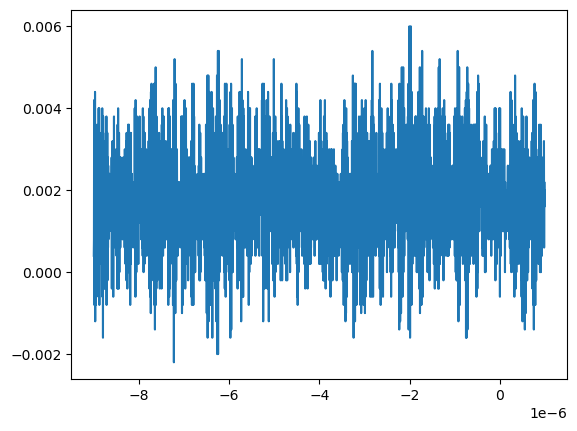

In [18]:
df = pd.read_csv(f'plots/clase3/ruidos ventanas/1 mus/{99}.csv')
plt.plot(df.t,df.V1)

In [29]:
save0('t_c','plots/clase3/disco')

VisaIOError: VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).